In [69]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [70]:
!ls "/gdrive/My Drive/CPS_ML"

dataset


## **Load DataSet**

In [71]:
import numpy as np
import pandas as pd

df = pd.read_csv("/gdrive/MyDrive/CPS_ML/dataset/dataset_full.csv")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


## Remove features that cannot be identified by URL only

In [72]:
columns_to_remove = [
    'time_response', 'domain_spf', 'asn_ip', 'time_domain_activation',
    'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
    'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
    'qty_redirects', 'url_google_index', 'domain_google_index'
]

df = df.drop(columns=columns_to_remove)
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,0,0,0,0,165,0,3,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,1


## Set X, y

In [73]:
X = df.drop(columns=['phishing'])
y = df['phishing']

print(X.shape)

(88647, 98)


## **RandomForest**

* Remove features with lower ***importance*** than the ***threshold***
* Adjusts hyperparameters ***n_estimators, max_depth***
* Add the ***oob_score*** hyperparameter, and check for overfitting

### - Training

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train an initial RandomForest model to determine feature importance
rf_model_initial = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42, oob_score=True)
rf_model_initial.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model_initial.feature_importances_
features = X.columns

# Organize feature importances into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Set importance threshold
threshold = 0.001
high_importance_features = importance_df[importance_df['Importance'] > threshold]['Feature']

# Count and display number of removed features
num_removed_features = len(features) - len(high_importance_features)
print(f"Number of removed features: {num_removed_features}")

# Filter data to keep only high-importance features
X_train_filtered = X_train[high_importance_features]
X_test_filtered = X_test[high_importance_features]

# Train a new RandomForest model with filtered data
RF_model = RandomForestClassifier(n_estimators=500, max_depth=50, random_state=42, oob_score=True)
RF_model.fit(X_train_filtered, y_train)

# Make predictions and evaluate performance
y_pred_filtered = RF_model.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
classification_rep_filtered = classification_report(y_test, y_pred_filtered)

# Display results
print(f"Accuracy after removing low-importance features: {accuracy_filtered*100:.2f}%")
print("OOB Score after filtering:", RF_model.oob_score_)
print("\nClassification Report after filtering:\n", classification_rep_filtered)

# Display the filtered importance DataFrame with high-importance features only
print("Filtered Importance DataFrame:")
print(importance_df[importance_df['Importance'] > threshold])

Number of removed features: 40
Accuracy after removing low-importance features: 93.74%
OOB Score after filtering: 0.9394540063172823

Classification Report after filtering:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     17449
           1       0.93      0.89      0.91      9146

    accuracy                           0.94     26595
   macro avg       0.93      0.93      0.93     26595
weighted avg       0.94      0.94      0.94     26595

Filtered Importance DataFrame:
                       Feature  Importance
57            directory_length    0.102232
18                  length_url    0.055848
75                 file_length    0.043626
42     qty_underline_directory    0.039463
36           qty_vowels_domain    0.039330
37               domain_length    0.039058
3                qty_slash_url    0.032440
40           qty_dot_directory    0.032237
46            qty_at_directory    0.031100
63              qty_equal_file    0.03

### - Visible to graph whether overfitting or not


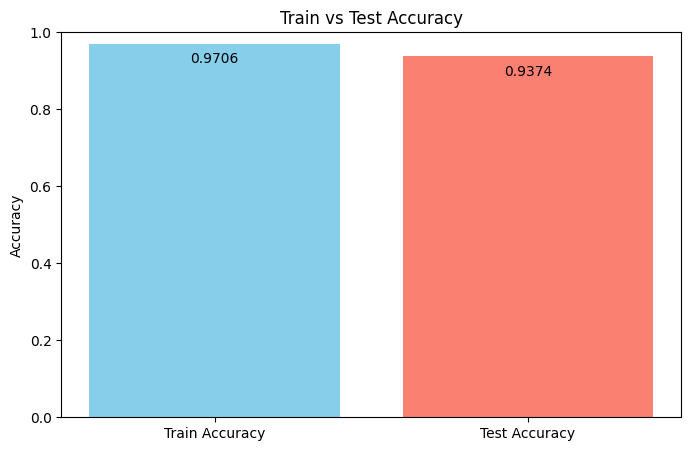

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on training and test data and calculate accuracy
y_train_pred = RF_model.predict(X_train_filtered)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = RF_model.predict(X_test_filtered)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Visualize accuracy as a bar chart
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.text(0, train_accuracy - 0.05, f"{train_accuracy:.4f}", ha='center')
plt.text(1, test_accuracy - 0.05, f"{test_accuracy:.4f}", ha='center')
plt.show()

## **Boosting**

* Adjusts hyperparameters ***n_estimators, max_depth, learning_rate***
* Check for overfitting

### - Training

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the GradientBoostingClassifier
GB_model = GradientBoostingClassifier(n_estimators=500, max_depth=5, learning_rate=0.1, random_state=42)

# Train the model
GB_model.fit(X_train, y_train)

# Make predictions
y_pred = GB_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.4f}%")
print("\nClassification Report:\n", classification_rep)

Accuracy: 93.5251%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     17449
           1       0.92      0.89      0.90      9146

    accuracy                           0.94     26595
   macro avg       0.93      0.92      0.93     26595
weighted avg       0.93      0.94      0.93     26595



### - Visible to graph whether overfitting or not


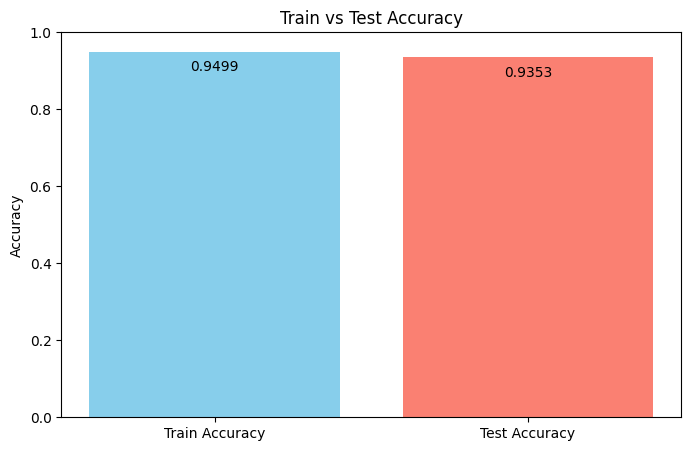

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on training and test data and calculate accuracy
y_train_pred = GB_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = GB_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Visualize accuracy as a bar chart
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.text(0, train_accuracy - 0.05, f"{train_accuracy:.4f}", ha='center')
plt.text(1, test_accuracy - 0.05, f"{test_accuracy:.4f}", ha='center')
plt.show()

## **Logistic Regression**

- To prevent overfitting, features with high ***correlation*** are removed by adjusting the ***threshold***
* Adjusts hyperparameters ***max_iter, C***
* Check the overfitting


### - Remove highly correlated features

In [78]:
import pandas as pd

# Compute correlation matrix
corr_matrix = X.corr().abs()

# Set correlation threshold
threshold = 0.7

# Initialize a set to hold features to be dropped
features_to_drop = set()

# Check only the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        # Identify feature pairs with correlation above the threshold
        if corr_matrix.iloc[i, j] >= threshold:
            colname1 = corr_matrix.index[i]
            colname2 = corr_matrix.columns[j]

            # Add one of the features in the pair to the drop list
            if colname1 not in features_to_drop:
                features_to_drop.add(colname2)
            else:
                features_to_drop.add(colname1)

# Drop highly correlated features from the original DataFrame
X_reduced = X.drop(columns=features_to_drop)

# Display results
print(f"Removed features: {features_to_drop}")
print(f"Reduced DataFrame shape: {X_reduced.shape}")
print(f"Number of reduced features: {len(features_to_drop)}")

Removed features: {'qty_comma_file', 'qty_exclamation_directory', 'qty_dollar_params', 'directory_length', 'qty_space_directory', 'qty_percent_directory', 'qty_dot_file', 'qty_equal_file', 'qty_dollar_file', 'qty_params', 'qty_dot_params', 'qty_space_file', 'qty_tilde_file', 'qty_and_params', 'params_length', 'qty_plus_params', 'qty_dollar_directory', 'qty_at_file', 'qty_hyphen_directory', 'qty_equal_params', 'qty_tilde_directory', 'qty_comma_directory', 'qty_slash_directory', 'qty_and_url', 'qty_questionmark_file', 'qty_tilde_params', 'email_in_url', 'qty_hashtag_directory', 'qty_exclamation_params', 'qty_asterisk_directory', 'qty_questionmark_directory', 'qty_hashtag_file', 'qty_space_params', 'qty_plus_file', 'qty_underline_file', 'qty_and_directory', 'qty_plus_directory', 'qty_dot_directory', 'qty_equal_directory', 'qty_asterisk_params', 'qty_hashtag_params', 'qty_and_file', 'qty_underline_params', 'qty_percent_file', 'qty_exclamation_file', 'qty_slash_file', 'qty_questionmark_para

In [79]:
# Check reduced X
X_reduced

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,...,domain_in_ip,server_client_domain,qty_underline_directory,qty_hyphen_file,file_length,qty_hyphen_params,qty_slash_params,qty_at_params,qty_percent_params,url_shortened
0,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,7,-1,-1,-1,-1,0
1,5,0,1,3,0,3,0,0,0,0,...,0,0,0,0,9,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,-1,-1,0
3,4,0,2,5,0,0,0,0,0,0,...,0,0,2,0,9,-1,-1,-1,-1,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,-1,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,0,0,-1,-1,-1,-1,-1,-1,-1,0
88643,2,0,0,0,0,0,0,0,0,0,...,0,0,-1,-1,-1,-1,-1,-1,-1,0
88644,2,1,0,5,0,0,0,0,0,0,...,0,0,0,0,11,-1,-1,-1,-1,0
88645,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,-1,-1,0


### - Training

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Display shapes of reduced feature matrix and target vector
print(f"Shape of X: {X_reduced.shape}")
print(f"Shape of y: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(random_state=42, max_iter=1000, C=0.5)
LR_model.fit(X_train, y_train)

# Perform predictions
y_pred = LR_model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Shape of X: (88647, 46)
Shape of y: (88647,)
Accuracy: 90.18%

Confusion Matrix:
[[16297  1152]
 [ 1460  7686]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     17449
           1       0.87      0.84      0.85      9146

    accuracy                           0.90     26595
   macro avg       0.89      0.89      0.89     26595
weighted avg       0.90      0.90      0.90     26595



### - Visible to graph whether overfitting or not

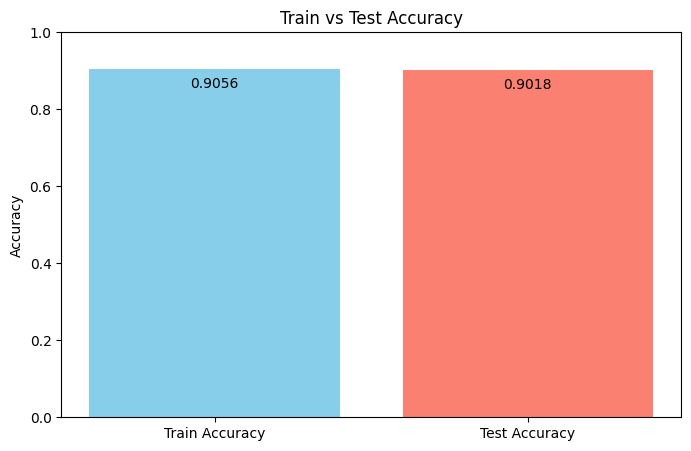

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on training and test data and calculate accuracy
y_train_pred = LR_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = LR_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Visualize accuracy as a bar chart
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.text(0, train_accuracy - 0.05, f"{train_accuracy:.4f}", ha='center')
plt.text(1, test_accuracy - 0.05, f"{test_accuracy:.4f}", ha='center')
plt.show()

## **SVM**

### - Training

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM model
SVM_model = SVC(kernel='rbf', C=0.5, random_state=42)

# Train the model
SVM_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = SVM_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification performance report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 91.16%
Confusion Matrix:
[[16143  1306]
 [ 1046  8100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     17449
           1       0.86      0.89      0.87      9146

    accuracy                           0.91     26595
   macro avg       0.90      0.91      0.90     26595
weighted avg       0.91      0.91      0.91     26595



### - Visible to graph whether overfitting or not

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


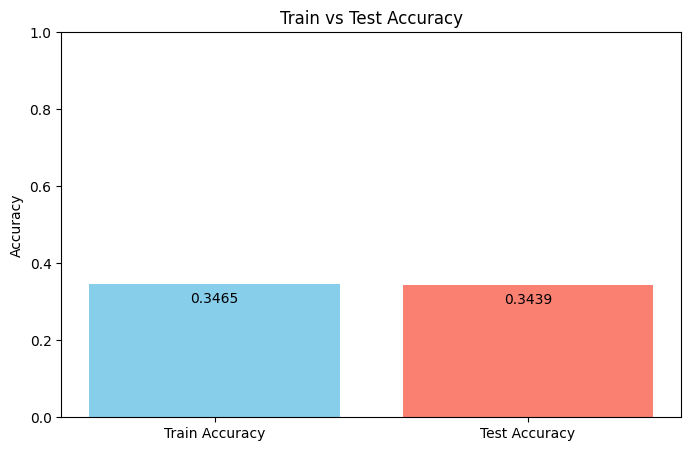

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on training and test data and calculate accuracy
y_train_pred = SVM_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = SVM_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Visualize accuracy as a bar chart
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.text(0, train_accuracy - 0.05, f"{train_accuracy:.4f}", ha='center')
plt.text(1, test_accuracy - 0.05, f"{test_accuracy:.4f}", ha='center')
plt.show()

# Fuction of filtering features

In [84]:
import re
from urllib.parse import urlparse

def extract_url_features(url):
    # URL 파싱
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    path = parsed_url.path
    params = parsed_url.query
    file = path.split('/')[-1] if path.split('/')[-1] else ''
    directory = '/'.join(path.split('/')[:-1])

    # 특성 계산
    features = {
        # 도메인 관련 특성
        'qty_at_domain': domain.count('@'),
        'qty_and_domain': domain.count('&'),
        'qty_exclamation_domain': domain.count('!'),
        'qty_space_domain': domain.count(' '),
        'qty_tilde_domain': domain.count('~'),
        'qty_comma_domain': domain.count(','),
        'qty_plus_domain': domain.count('+'),
        'qty_asterisk_domain': domain.count('*'),
        'qty_hashtag_domain': domain.count('#'),
        'qty_dollar_domain': domain.count('$'),
        'qty_percent_domain': domain.count('%'),
        'qty_vowels_domain': sum(1 for c in domain if c.lower() in 'aeiou'),
        'domain_length': len(domain),
        'domain_in_ip': 1 if re.match(r'^\d+\.\d+\.\d+\.\d+$', domain) else 0,
        'server_client_domain': 1 if 'server' in domain or 'client' in domain else 0,

        # 디렉토리 관련 특성
        'qty_dot_directory': directory.count('.'),
        'qty_hyphen_directory': directory.count('-'),
        'qty_underline_directory': directory.count('_'),
        'qty_slash_directory': directory.count('/'),
        'qty_questionmark_directory': directory.count('?'),
        'qty_equal_directory': directory.count('='),
        'qty_at_directory': directory.count('@'),
        'qty_and_directory': directory.count('&'),
        'qty_exclamation_directory': directory.count('!'),
        'qty_space_directory': directory.count(' '),
        'qty_tilde_directory': directory.count('~'),
        'qty_comma_directory': directory.count(','),
        'qty_plus_directory': directory.count('+'),
        'qty_asterisk_directory': directory.count('*'),
        'qty_hashtag_directory': directory.count('#'),
        'qty_dollar_directory': directory.count('$'),
        'qty_percent_directory': directory.count('%'),
        'directory_length': len(directory),

        # 파일 관련 특성
        'qty_dot_file': file.count('.'),
        'qty_hyphen_file': file.count('-'),
        'qty_underline_file': file.count('_'),
        'qty_slash_file': file.count('/'),
        'qty_questionmark_file': file.count('?'),
        'qty_equal_file': file.count('='),
        'qty_at_file': file.count('@'),
        'qty_and_file': file.count('&'),
        'qty_exclamation_file': file.count('!'),
        'qty_space_file': file.count(' '),
        'qty_tilde_file': file.count('~'),
        'qty_comma_file': file.count(','),
        'qty_plus_file': file.count('+'),
        'qty_asterisk_file': file.count('*'),
        'qty_hashtag_file': file.count('#'),
        'qty_dollar_file': file.count('$'),
        'qty_percent_file': file.count('%'),
        'file_length': len(file),

        # 파라미터 관련 특성
        'qty_dot_params': params.count('.'),
        'qty_hyphen_params': params.count('-'),
        'qty_underline_params': params.count('_'),
        'qty_slash_params': params.count('/'),
        'qty_questionmark_params': params.count('?'),
        'qty_equal_params': params.count('='),
        'qty_at_params': params.count('@'),
        'qty_and_params': params.count('&'),
        'qty_exclamation_params': params.count('!'),
        'qty_space_params': params.count(' '),
        'qty_tilde_params': params.count('~'),
        'qty_comma_params': params.count(','),
        'qty_plus_params': params.count('+'),
        'qty_asterisk_params': params.count('*'),
        'qty_hashtag_params': params.count('#'),
        'qty_dollar_params': params.count('$'),
        'qty_percent_params': params.count('%'),
        'params_length': len(params),
        'tld_present_params': 1 if re.search(r'\.(com|net|org|edu|gov|int|mil|arpa|asia|jobs|mobi|name|post|pro|tel|travel|xxx)', params) else 0,

        # URL 내 기타 정보
        'qty_params': params.count('&') + 1 if params else 0,
        'email_in_url': 1 if re.search(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', url) else 0,
        'url_shortened': 1 if re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|yfrog|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl|snipurl|short\.to|budurl|ping\.fm|post\.ly|just\.as|bkite|snipr|fic\.kr|loopt\.us|doiop|short\.ie|kl\.am|wp\.me|rubyurl|om\.ly|to\.ly|bit\.do|lnkd\.in|db\.tt|qr\.ae|adf\.ly|bitly\.com|cur\.lv|ity\.im|q\.gs|po\.st|bc\.vc|j\.mp|buzurl\.com|cutt\.us|u\.to|9nl\.me|plink|cloudflare|bl\.ink|sprtlnk|spr\.ly|bit\.ly|flipboard|pckod|sptnk|ifttt\.com|crwd\.com|snpy|triad|marcom|qrpic|qrslp|qrpun|frtky|vnmr|vrlab|v1lnk|qrpun|vklbr|vkmvr|vizor|avist|irxs|miudr|bcr', url) else 0
    }

    return features

# 테스트
url = "http://www.example.com/path/to/page?name=test&value=123"
features = extract_url_features(url)
print(features)


{'qty_at_domain': 0, 'qty_and_domain': 0, 'qty_exclamation_domain': 0, 'qty_space_domain': 0, 'qty_tilde_domain': 0, 'qty_comma_domain': 0, 'qty_plus_domain': 0, 'qty_asterisk_domain': 0, 'qty_hashtag_domain': 0, 'qty_dollar_domain': 0, 'qty_percent_domain': 0, 'qty_vowels_domain': 4, 'domain_length': 15, 'domain_in_ip': 0, 'server_client_domain': 0, 'qty_dot_directory': 0, 'qty_hyphen_directory': 0, 'qty_underline_directory': 0, 'qty_slash_directory': 2, 'qty_questionmark_directory': 0, 'qty_equal_directory': 0, 'qty_at_directory': 0, 'qty_and_directory': 0, 'qty_exclamation_directory': 0, 'qty_space_directory': 0, 'qty_tilde_directory': 0, 'qty_comma_directory': 0, 'qty_plus_directory': 0, 'qty_asterisk_directory': 0, 'qty_hashtag_directory': 0, 'qty_dollar_directory': 0, 'qty_percent_directory': 0, 'directory_length': 8, 'qty_dot_file': 0, 'qty_hyphen_file': 0, 'qty_underline_file': 0, 'qty_slash_file': 0, 'qty_questionmark_file': 0, 'qty_equal_file': 0, 'qty_at_file': 0, 'qty_and_f